# "Fourier Transform"

- toc: false
- comments: true
- hide: true
- search_exclude: true

In [1]:
import numpy as np

import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams["figure.figsize"] = (5,5)

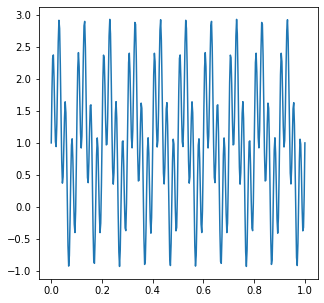

In [2]:
t = np.linspace(0,1,365)
f = 10
series = 1 + np.sin(f*2*np.pi*t) + np.sin(f*4*2*np.pi*t)

plt.figure()
plt.plot(t, series)

36


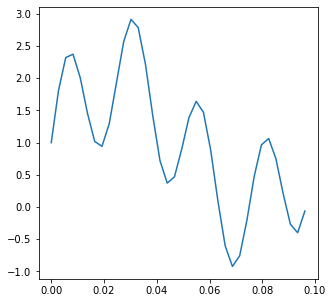

In [3]:
days = int(365/f)
print(days)
plt.plot(t[:days], series[:days])

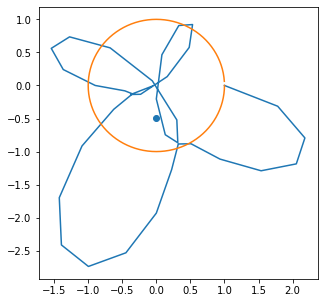

In [4]:
f = 10
days = int(365/f)
signal_real, signal_img = zip(*[(series[i] * np.cos(-2*np.pi/days*i), 
                                 series[i] * np.sin(-2*np.pi/days*i)) for i in range(days)])
#signal
plt.plot(signal_real, signal_img)
#center
plt.scatter(np.mean(signal_real), np.mean(signal_img))
#circle
plt.plot(*zip(*[(np.cos(-2*np.pi/100*i), np.sin(-2*np.pi/100*i)) for i in range(100)]))

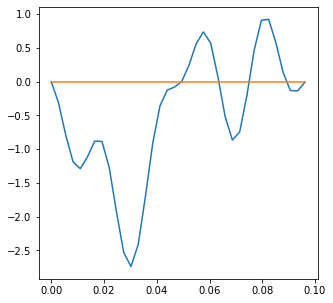

In [5]:
plt.plot(t[:days], signal_img)
plt.plot(t[:days], np.zeros(len(signal_real)))

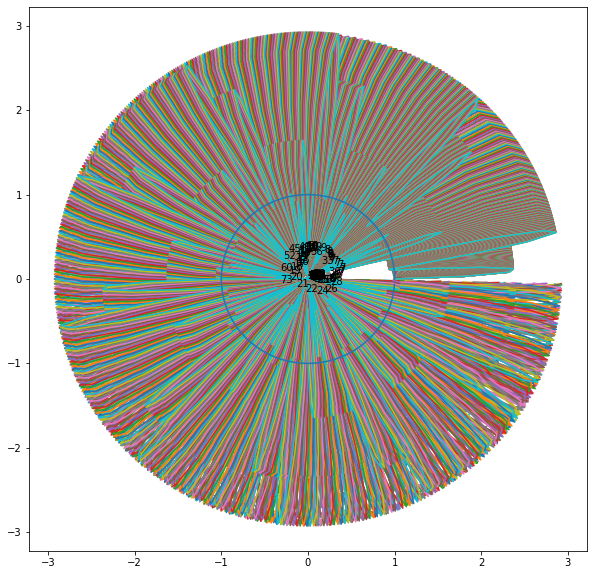

In [6]:
freq = []
values = []
plt.figure(figsize=(10,10))
for days in range(5,365,1):
    signal_real, signal_img = zip(*[(np.abs(series[i]) * np.cos(2*np.pi/days*i), 
                                           np.abs(series[i]) * np.sin(2*np.pi/days*i)) for i in range(days)])
    #signal
    plt.scatter(np.mean(signal_real), np.mean(signal_img))
    #center
    plt.plot(signal_real, signal_img)
    plt.annotate(int(365/days), (np.mean(signal_real), np.mean(signal_img)))
    freq.append(365/days)
    values.append(np.mean(signal_img))
#circle
plt.plot(*zip(*[(np.cos(2*np.pi/100*i), np.sin(2*np.pi/100*i)) for i in range(100)]))

Text(0, 0.5, 'Amplitude')

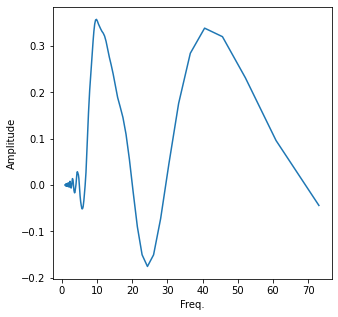

In [7]:
plt.plot(freq, values)
plt.xlabel("Freq.")
plt.ylabel("Amplitude")

## Seasonality

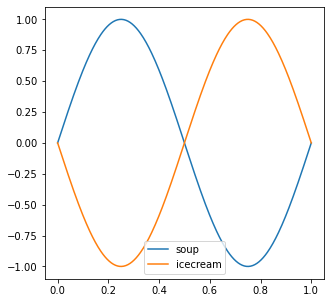

In [8]:
t = np.linspace(0,1,365)
f = 1
series = np.sin(f*2*np.pi*t)
series2 = np.sin(f*2*np.pi*(t+0.5))

plt.figure(figsize=(5,5))
plt.plot(t, series, label="soup")
plt.plot(t, series2, label="icecream")
plt.legend()

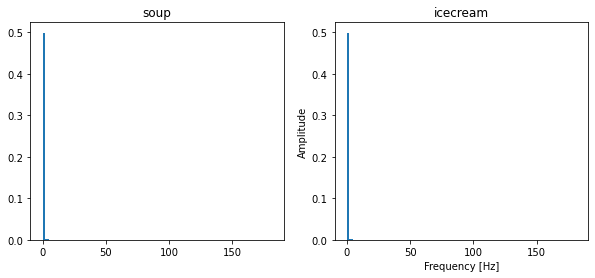

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
period = t[1] - t[0]  # sampling interval 
N = series.size

# 1/T = frequency
f = np.linspace(0, 1 / period, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
ax[0].bar(f[:N // 2], np.abs(np.fft.fft(series))[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
ax[0].title.set_text("soup")
ax[1].bar(f[:N // 2], np.abs(np.fft.fft(series2))[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
ax[1].title.set_text("icecream")